### Import Data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import re
import nltk
import wordcloud

In [1]:

data = pd.read_excel("selected_songs.xlsx")
data

NameError: ignored

## PART I : Data Preprocessing

### 1-) Removing Numbers, Punctuations and Lower the Words

In [ ]:
# Please run the code
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

#### Applied <b>rid_of_specials</b> to lyrics column.


In [ ]:
data['lyrics'] = data["lyrics"].map(rid_of_specials)## Code here ~~ Complete 1 line code to perform rid_of_specials on lyrics column in your dataset.

In [ ]:
# This code is applied to each row of data["lyrics"] column. What it does is it removes all the special characters 
# and leaves only the letters behind and it also lower-cases every word. 

### 2-) Tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
tokenized=[word_tokenize(i) for i in data['lyrics']]

### 3-) Removing Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stopped = [[i for i in j if i not in stop_words] for j in tokenized]

In [ ]:
# First, it downloads the nltk library and specifically stopwords. Then, we assign all the stopwords which are in 
# english to stop_words variable. Later, we go through the tokenized list and find every non stop_words there. 
# Then, we assign these to variable stopped. We run this code because we want to purify our text data from stop_words
# in order to eliminate the situation of mis-classifying since the stopwords are in each lyric.

### 4-) Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
prepeared_sentence= [' '.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence

First we import WordNetLemmatizer from nltk.stem library. Then we initialize our WordNetLemmatizer by assigning
it to lemmatizer variable. Then, we go through the stopped list which contains stopword-free lyrics and select
 the root forms of words and assign them to lemmatized list. Later on, we go through this lemmatized list and then
 we make it a whole sentence and assign these to prepeared_sentence variable. Then we assign this to a column 
 in our dataset which is data["Lyrics_Processed"].
 By running this code, we obtain a fully sentence free of stop words and special characters and in a most purified way.


 We may have used Stemming instead of Lemmatization. Because, Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced.

### 5-) Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(prepeared_sentence)
feature_names = vectorizer.get_feature_names()
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

We import CountVectorizer which counts the number of words given the sentence from sklearn library then we initialize it as vectorizer. Later we fit and transform our prepeared_sentence and assign it to our X variable. Later, we get our feature names by get_feature_names method and then we create a data frame caled lyrics_vectorized which consists of the previous fitted and transformed prepeared_sentences and column names we just obtained.

We use countVectorizer because the words are important, not the whole sentence itself. The model that we are going to build should consist of the words of lyrics'. Because, if we think of the other way, if we build our model based on sentences, we would not be able to build a specific model enough to classify the songs.

### 6-) Target Preperation

In [ ]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [ ]:
y = data.genre.map({'prog':1,'pop':0})
y

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64

Variable y is a single line target preperation step seen above. By looking at that output y, I rewrote that target creation step
by using <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>
OneHotEnconder()</a> 
 function.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder()

genre_cat = data["genre"]
genreLabelEncoded = labelEncoder.fit_transform(genre_cat)
genre_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(genreLabelEncoded.reshape(-1,1)).toarray())
genre_cat_encoded.columns = oneHotEncoder.get_feature_names(["genre"])
data = data.join(genre_cat_encoded)
data.drop("genre",axis=1,inplace=True);
data

,lyrics,Artist,Song,Lyrics_Processed,genre_0,genre_1
0,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good time gon na show st...,0.0,1.0
1,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh reach ooooh matter t...,0.0,1.0
2,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone two one really love walk outside wall ha...,0.0,1.0
3,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning ...,0.0,1.0
4,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy got ta real need got sleep toe stree...,0.0,1.0
...,...,...,...,...,...,...
825,i don t know that you want to try evertime y...,Michael Jackson,Remember The Time Lyrics,know want try evertime see remember fell love ...,1.0,0.0
826,girl close your eyes let that rhythm get int...,Michael Jackson,Rock With You Lyrics,girl close eye let rhythm get try fight nothin...,1.0,0.0
827,help i have done it again i have been here m...,Sia,Breathe Me Lyrics,help done many time hurt today worst part one ...,1.0,0.0
828,yeah rihanna good girl gone bad take three ...,Rihanna,Umbrella Lyrics,yeah rihanna good girl gone bad take three act...,1.0,0.0


## PART II : Exploratory Data Analysis 

In [ ]:
popSongs=data[data.genre_1==0]
progSongs=data[data.genre_1==1]
progSongs

,lyrics,Artist,Song,Lyrics_Processed,genre_0,genre_1
0,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good time gon na show st...,0.0,1.0
1,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh reach ooooh matter t...,0.0,1.0
2,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone two one really love walk outside wall ha...,0.0,1.0
3,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning ...,0.0,1.0
4,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy got ta real need got sleep toe stree...,0.0,1.0
...,...,...,...,...,...,...
408,beyond the horizon of the place we lived when ...,Pink Floyd,High Hopes Lyrics,beyond horizon place lived young world magnet ...,0.0,1.0
409,mother do you think they ll drop the bomb m...,Pink Floyd,Mother Lyrics,mother think drop bomb mother think like song ...,0.0,1.0
410,you yes you stand still laddy when we gre...,Pink Floyd,The Happiest Days of Our Lives Lyrics,yes stand still laddy grew went school certain...,0.0,1.0
411,look mummy there s an aeroplane up in the s...,Pink Floyd,Goodbye Blue Sky Lyrics,look mummy aeroplane sky ooo ooo ooo ooo ooo o...,0.0,1.0


In [ ]:
      pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

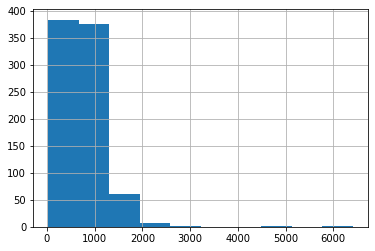

In [ ]:
# number of characters present in each lyric
data['Lyrics_Processed'].str.len().hist()

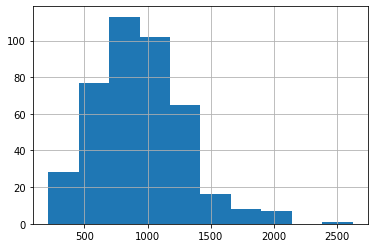

In [ ]:
# number of characters present in each pop song
popSongs['Lyrics_Processed'].str.len().hist()

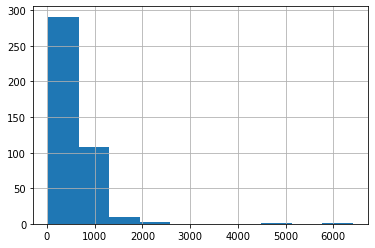

In [ ]:
# number of characters present in each prog song
progSongs['Lyrics_Processed'].str.len().hist()

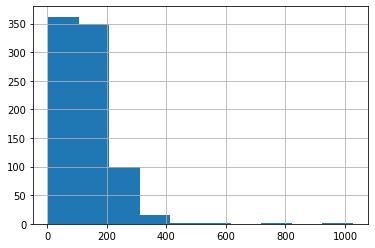

In [ ]:
#  the number of words appearing in each song lyric
data['Lyrics_Processed'].str.split().map(lambda x: len(x)).hist()

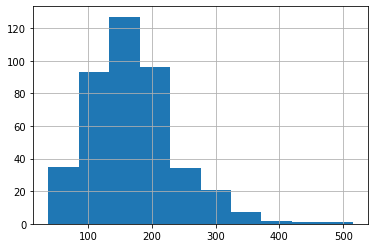

In [ ]:
#  the number of words appearing in each pop song lyric
popSongs['Lyrics_Processed'].str.split().map(lambda x: len(x)).hist()

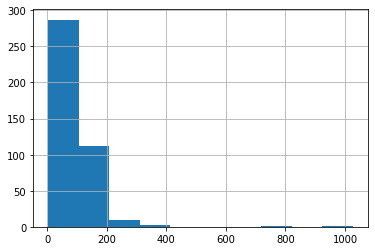

In [ ]:
#  the number of words appearing in each prog song lyric
progSongs['Lyrics_Processed'].str.split().map(lambda x: len(x)).hist()

We can see that progressive songs contain more words

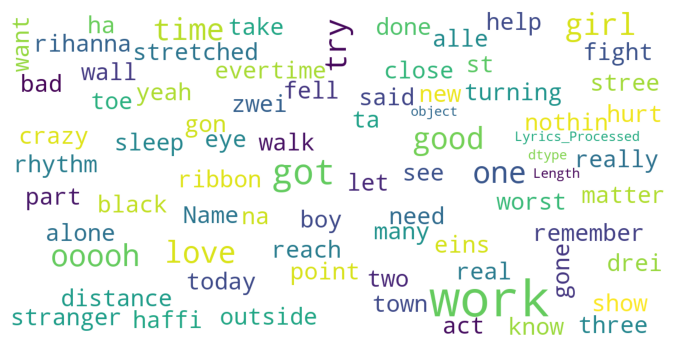

In [ ]:
# The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['Lyrics_Processed'])

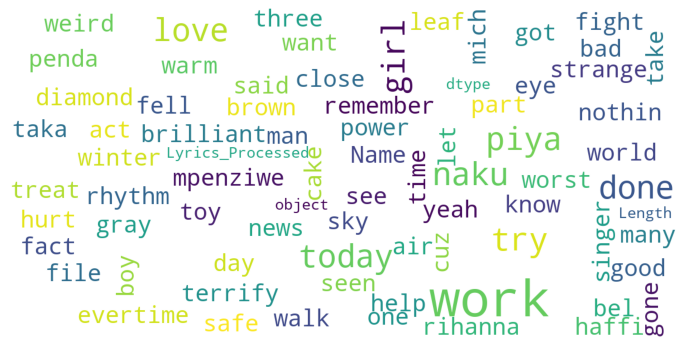

In [ ]:
##WORDCLOUD OF POP SONGS
show_wordcloud(popSongs['Lyrics_Processed'])

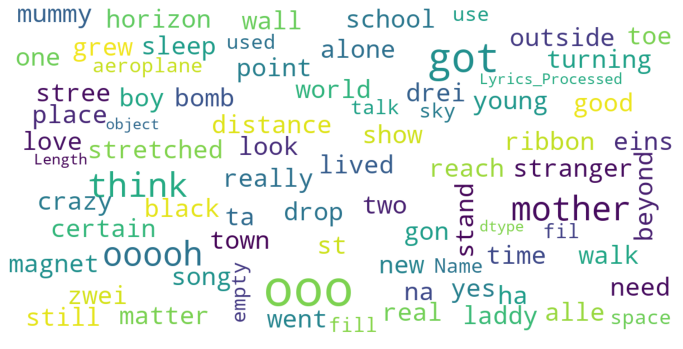

In [ ]:
##WORDCLOUD OF PROG SONGS
show_wordcloud(progSongs['Lyrics_Processed'])

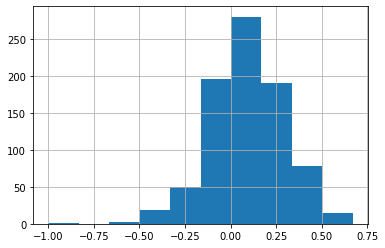

In [ ]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity_score'] = data['Lyrics_Processed'].\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

# The polarity is around 0.175 which we may say that 
# the overall lyrics' meanings are neutral but in a positive direction.

# If songs' lyrics being positive or negative has a significant meaning in determining whether a song is pop or prog,
# this feature may help us classify songs.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


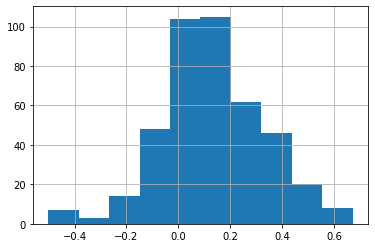

In [ ]:
popSongs['polarity_score'] = popSongs['Lyrics_Processed'].apply(lambda x : polarity(x))
popSongs['polarity_score'].hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


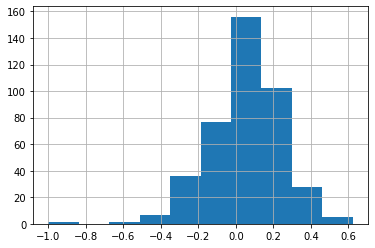

In [ ]:
progSongs['polarity_score'] = progSongs['Lyrics_Processed'].apply(lambda x : polarity(x))
progSongs['polarity_score'].hist()

There is no significant difference of polarity scores

In [ ]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)


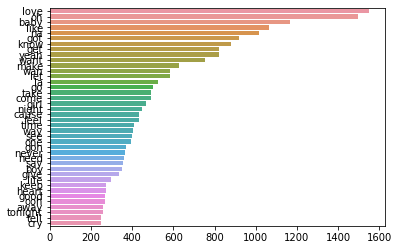

In [ ]:
##MOST USED WORDS IN POP SONGS
plot_top_non_stopwords_barchart(popSongs['Lyrics_Processed'])

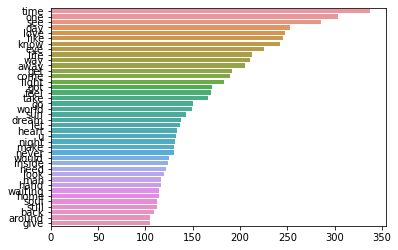

In [ ]:
##MOST USED WORDS IN PROG SONGS
plot_top_non_stopwords_barchart(progSongs['Lyrics_Processed'])

## PART III : Feature Creation & Selection

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder()

artist_cat = data["Artist"]
artistLabelEncoded = labelEncoder.fit_transform(artist_cat)
artist_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(artistLabelEncoded.reshape(-1,1)).toarray())
artist_cat_encoded.columns = oneHotEncoder.get_feature_names(["Artist"])
data = data.join(artist_cat_encoded)
data.drop("Artist",axis=1,inplace=True);
data

,lyrics,Song,Lyrics_Processed,genre_0,genre_1,polarity_score,Artist_0,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9,Artist_10
0,i am just a new boy stranger in this town w...,Young Lust Lyrics,new boy stranger town good time gon na show st...,0.0,1.0,-0.216364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,eins zwei drei alle ooooh you cannot reach...,Waiting For The Worms Lyrics,eins zwei drei alle ooooh reach ooooh matter t...,0.0,1.0,-0.053846,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,all alone or in twos the ones who really lov...,Outside The Wall Lyrics,alone two one really love walk outside wall ha...,0.0,1.0,0.077083,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,into the distance a ribbon of black stretched...,Learning To Fly Lyrics,distance ribbon black stretched point turning ...,0.0,1.0,0.043773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,you got to be crazy gotta have a real need g...,Dogs Lyrics,got crazy got ta real need got sleep toe stree...,0.0,1.0,-0.002554,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,i don t know that you want to try evertime y...,Remember The Time Lyrics,know want try evertime see remember fell love ...,1.0,0.0,0.311688,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
826,girl close your eyes let that rhythm get int...,Rock With You Lyrics,girl close eye let rhythm get try fight nothin...,1.0,0.0,-0.014286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
827,help i have done it again i have been here m...,Breathe Me Lyrics,help done many time hurt today worst part one ...,1.0,0.0,0.068750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
828,yeah rihanna good girl gone bad take three ...,Umbrella Lyrics,yeah rihanna good girl gone bad take three act...,1.0,0.0,0.216987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data = pd.concat([data,lyrics_vectorized],axis=1)

In [ ]:
data.drop(["Lyrics_Processed","genre_0","polarity_score"],axis=1,inplace=True)

#### b. Perform feature selection/elimination and show your codes.

In [ ]:
# We may drop lyrics column since we already have it processed in another column.
# On the other hand, I don't think Song names do not provide any assistance either. Might as well drop them too.

data.drop("Song",axis=1,inplace=True)
data.drop("lyrics",axis=1,inplace=True)

In [ ]:
data

,genre_1,Artist_0,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9,Artist_10,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,abandoned,abbot,abc,abilene,ability,ablaze,able,aboard,abode,abound,abraham,abridge,absence,absent,absinthe,absolution,absorbed,abstraction,...,yaw,yawa,yawning,yayo,ye,yea,yeah,year,yearning,yell,yellin,yellow,yep,yer,yes,yessongs,yesterday,yet,yield,yo,york,young,younger,youngest,youth,youuuuuu,youuuuuuuu,yudman,zag,zebra,zen,zeus,zig,zip,zombie,zone,zoning,zoo,zwei,zy
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
826,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## PART IV : Train - Test Splitting

###### Now it is time to split the data into train and test parts.

In [ ]:
from sklearn.model_selection import train_test_split

target = data['genre_1']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=100)


In [ ]:
X_train.drop("genre_1",axis=1,inplace=True)
X_test.drop("genre_1",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=8, test_size=0.3,random_state=100)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
print(data.shape); print(X_train.shape); print(X_test.shape)


(830, 8083)
(581, 8071)
(249, 8071)


We created a target variable which is our data["genre_1"]. This is what we are trying to classify. Based on this and our data set, we splitted our data into train and test sets. Later, we dropped our target variables from our train and test sets because it would mean that our model would learn more and overfit. Then, we used StratifiedShuffleSplit because we had some suspicion regarding overfitting and we wanted to shuffle our dataset as much as possible.

## PART V : Modelling

#### 1-) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test) 


#### 2-) Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)
y_predDT = clf.predict(X_test)


#### 3-) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100).fit(X_train, y_train)
y_predRF = classifier.predict(X_test) 


#### 4-) GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

y_predGBM = model.predict(X_test)

### PART VI : Model Evaluation

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


The accuracy is: 0.9076305220883534
The F1 score is: 0.9076245624788296
The training accuracy is: 0.9690189328743546
The confusion matrix is: 
[[112  12]
 [ 11 114]]


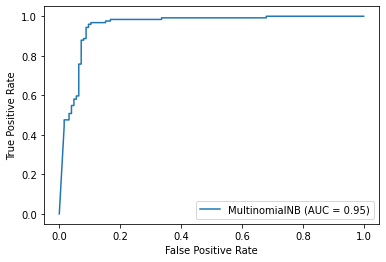

In [ ]:
# Naive Bayes Model

accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy is: " + str(accuracy))
print("The F1 score is: " + str(f1_score(y_test, y_pred, average='macro')))
print("The training accuracy is: " + str(nb_classifier.score(X_train,y_train)))

Conf_metrics = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
print("The confusion matrix is: ")
print(Conf_metrics)

metrics.plot_roc_curve(nb_classifier, X_test, y_test)  
plt.show()                                   

Accuracy: 0.8634538152610441
The F1 score is: 0.8633458161157024
The training accuracy is: 1.0
The confusion matrix is: 
[[104  20]
 [ 14 111]]


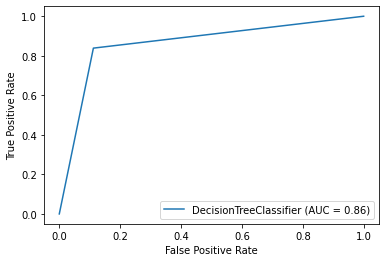

In [ ]:
# Decision Tree Model

print("Accuracy:",metrics.accuracy_score(y_test, y_predDT))
print("The F1 score is: " + str(f1_score(y_test, y_predDT, average='macro')))
print("The training accuracy is: " + str(clf.score(X_train,y_train)))

Conf_metrics = metrics.confusion_matrix(y_test, y_predDT, labels=[1, 0])
print("The confusion matrix is: ")
print(Conf_metrics)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                                   

The accuracy is: 0.8594377510040161
The F1 score is: 0.8592106751102566
The training accuracy is: 1.0
The confusion matrix is: 
[[102  22]
 [ 13 112]]


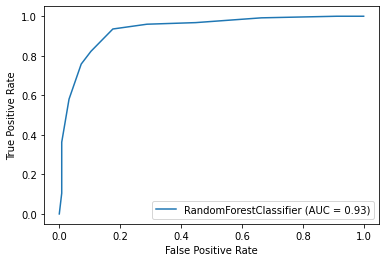

In [ ]:
# Random Forest Model

accuracy_RF = metrics.accuracy_score(y_test, y_predRF)
print("The accuracy is: " + str(accuracy_RF))
print("The F1 score is: " + str(f1_score(y_test, y_predRF, average='macro')))
print("The training accuracy is: " + str(classifier.score(X_train,y_train)))

Conf_metrics_RF = metrics.confusion_matrix(y_test, y_predRF, labels=[1,0])
print("The confusion matrix is: ")
print(Conf_metrics_RF)

metrics.plot_roc_curve(classifier, X_test, y_test)  
plt.show()                                   

Accuracy score (training): 1.000
The F1 score is: 0.863433991482772
Accuracy score (test): 0.863
The confusion matrix is: 
[[106  18]
 [ 16 109]]


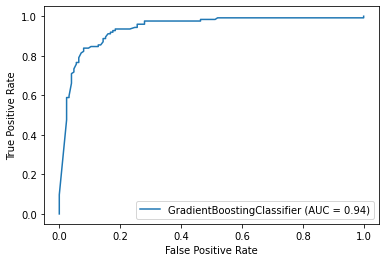

In [ ]:
# GBM Model

n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("The F1 score is: " + str(f1_score(y_test, y_predGBM, average='macro')))
print("Accuracy score (test): {0:.3f}".format(model.score(X_test, y_test)))

Conf_metrics_GBM = metrics.confusion_matrix(y_test, y_predGBM, labels=[1,0])
print("The confusion matrix is: ")
print(Conf_metrics_GBM)

metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()                                   

## Analysis of Results

1.   Naive Bayes Model
    
    * The accuracy is: 0.9076305220883534
    * The F1 score is: 0.9076245624788296
    * The training accuracy is: 0.9690189328743546
    * The confusion matrix is: 
        [[112  12]
        [ 11 114]]
    * AUC: 0.95 
    
2.   Decision Tree Model

    * Accuracy: 0.8755020080321285
    * The F1 score is: 0.8754939755149443
    * The training accuracy is: 1.0
    * The confusion matrix is: 
        [[108  16]
        [ 15 110]]
    * AUC: 0.88

3.   Random Forest Model

    * The accuracy is: 0.8594377510040161
    * The F1 score is: 0.8592106751102566
    * The training accuracy is: 1.0
    * The confusion matrix is: 
        [[102  22]
        [ 13 112]]
    * AUC: 0.93

4.   GBM Model
    * The accuracy is: 0.863
    * The F1 score is: 0.863433991482772
    * The training accuracy is: 1.000
    * The confusion matrix is: 
        [[106  18]
        [ 16 109]]
    * AUC: 0.94

The train accuracy: The accuracy of a model on examples it was constructed on.

The test accuracy: The accuracy of a model on examples it hasn't seen.

Overall, our F1 scores and accuracies are almost identical.
In terms of accuracy, Naive Bayes did the best job. Right after that, Decision Tree, GBM and Random Forest come in order. 

***Accuracy:*** NaiveBayes > Decision Tree > GBM > Random Forest

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

Hence, in terms of AUC (area under the curve), Naive Bayes came first. Right after it, GBM, Random Forest and Decision Tree came in order.

***AUC:*** Naive Bayes > GBM > Random Forest > Decision Tree

In conclusion, Naive Bayes model did a better job than everything else. 
